<a href="https://colab.research.google.com/github/lpoggetto/aulas_machine_learning_FIAP/blob/main/aula3/trabalho_ML_aula3_20240924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Escolha uma base de dados no https://www.kaggle.com/datasets, e se familiarize com sua base.
2. Procure realizar a previsão (inferência) de uma variável categórica através de um kNN. Se certifique de medir seus níveis de assertividade. Esteja a vontade a realizar mais de um e compará-los  
3. Não esqueça de junto com seus códigos realizar suas análises/conclusões (use o botão de +Texto).

In [22]:
# https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# libraries for knn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [5]:
# importando o dataet
df = pd.read_csv('/content/health_care_diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# avaliando a distribuicao das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


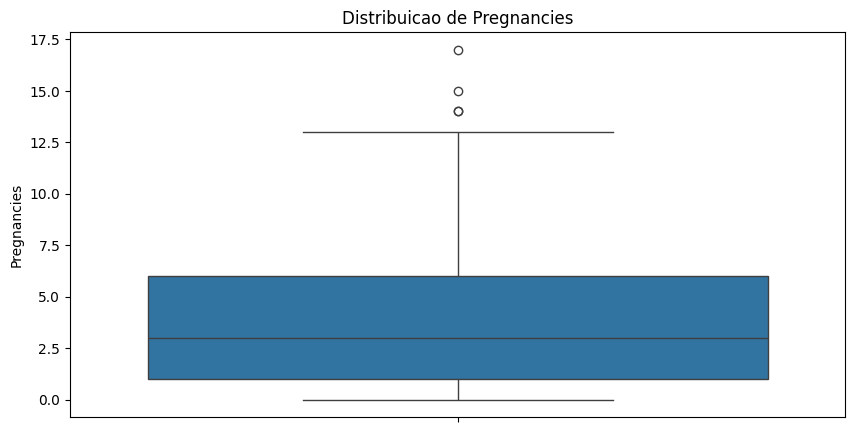

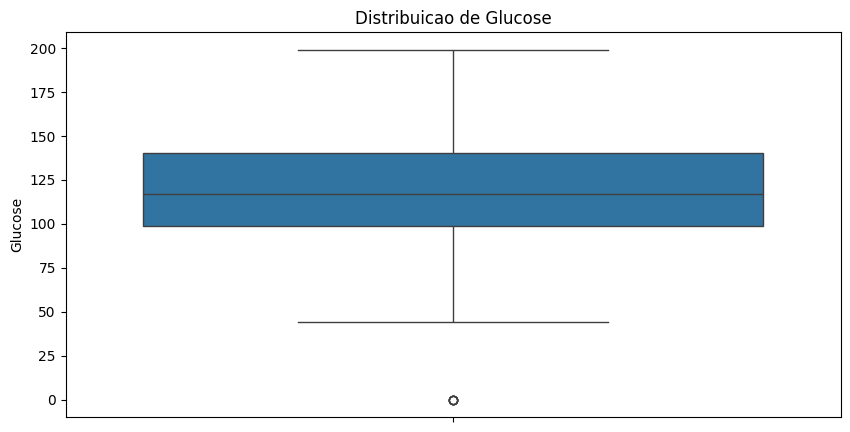

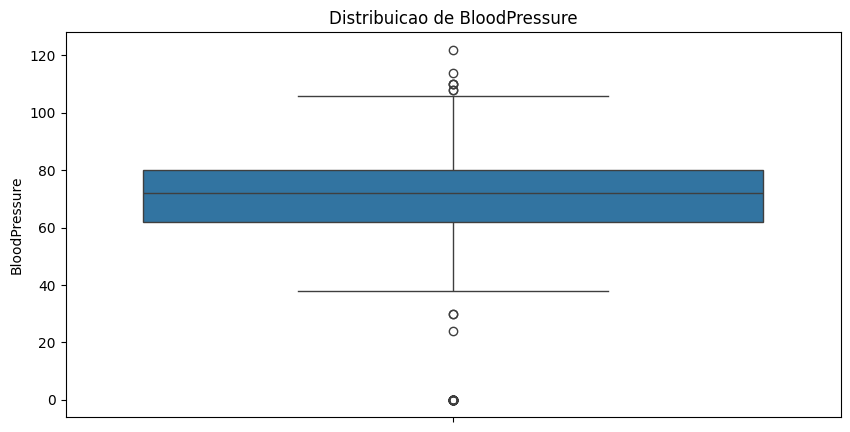

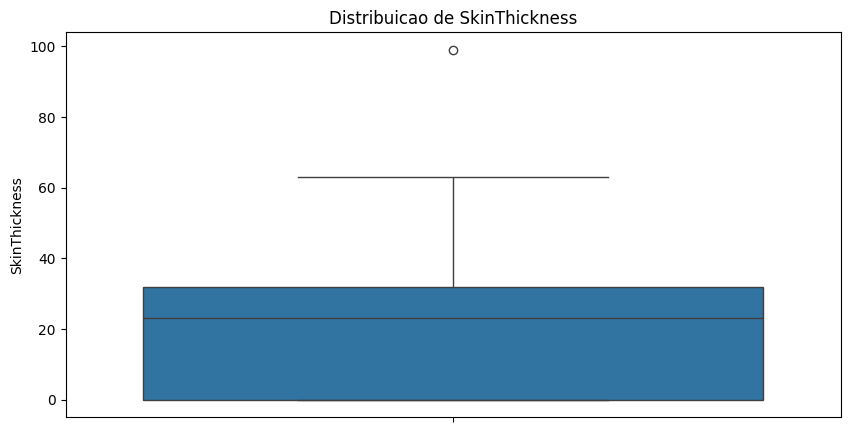

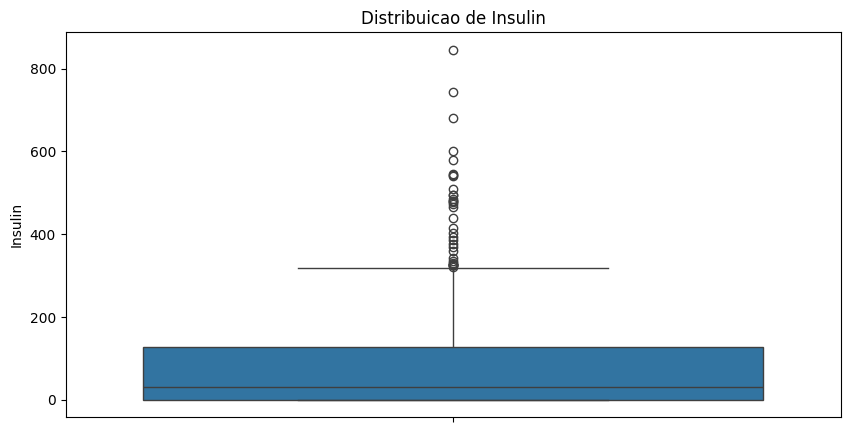

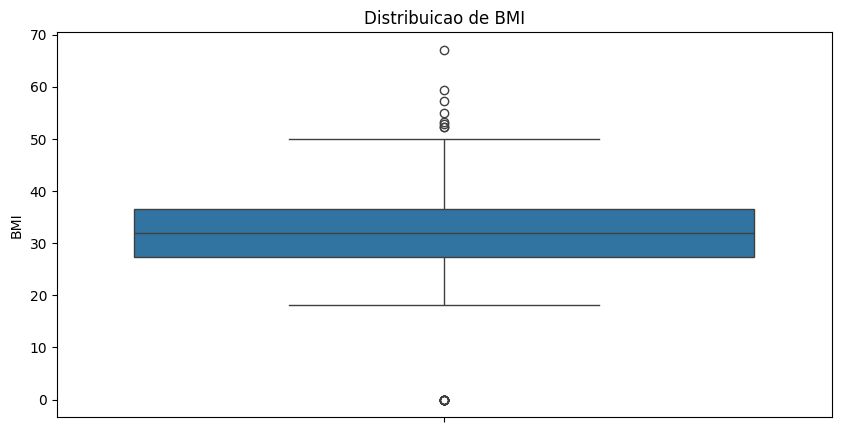

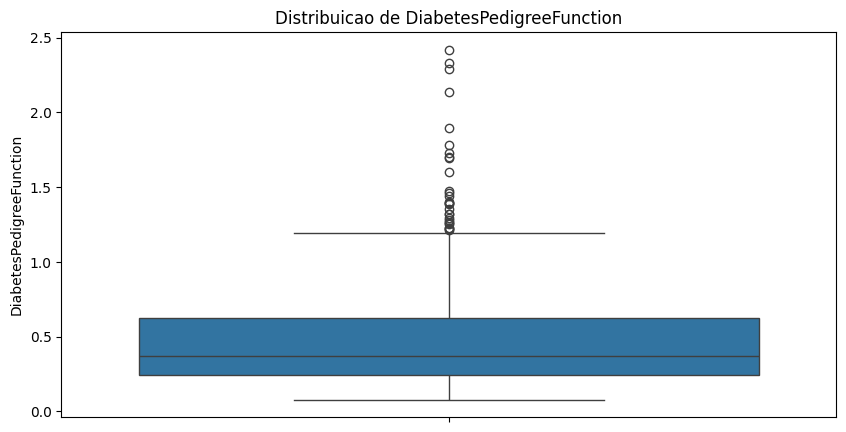

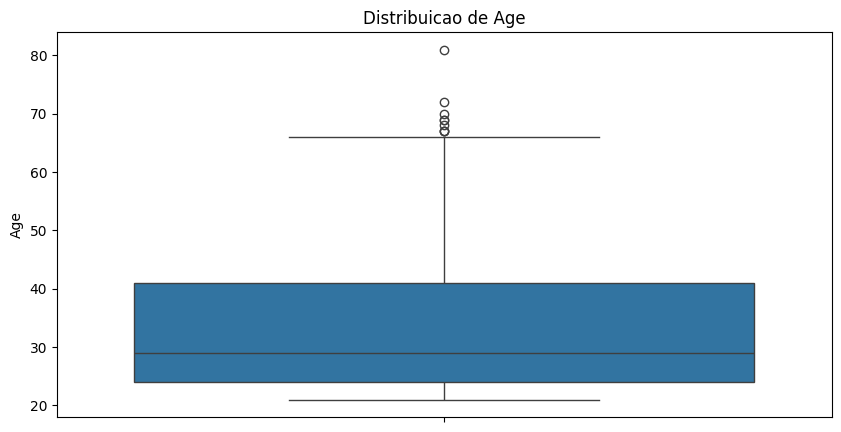

In [9]:
# para cada coluna exceto outcome, plotando a distribuicao atraves de um boxplot
for col in df.columns[:-1]:
  plt.figure(figsize=(10,5))
  plt.title(f'Distribuicao de {col}')
  sns.boxplot(y=df[col])

In [12]:
# separando os dados em treino e teste
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Gerando o modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

acc_treino = knn.score(X_train, y_train)
acc_teste = knn.score(X_test, y_test)

print(f'Acuracia Treino: {acc_treino * 100}')
print(f'Acuracia Teste: {acc_teste * 100}')

Acuracia Treino: 79.80456026058633
Acuracia Teste: 66.23376623376623


In [24]:
# aplicando predict
prev_teste = knn.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [25]:
# validando a acuracia
print(classification_report(y_test, prev_teste))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



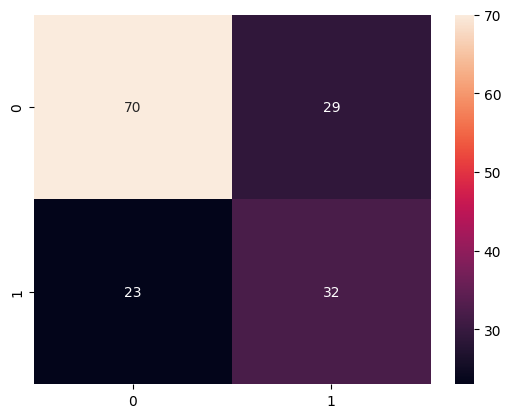

In [20]:
# plotando matriz de confusao
cm = confusion_matrix(y_test, prev_teste)
sns.heatmap(cm, annot=True, fmt='d');

### Removendo os outliers para melhoras performance do modelo.

In [27]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

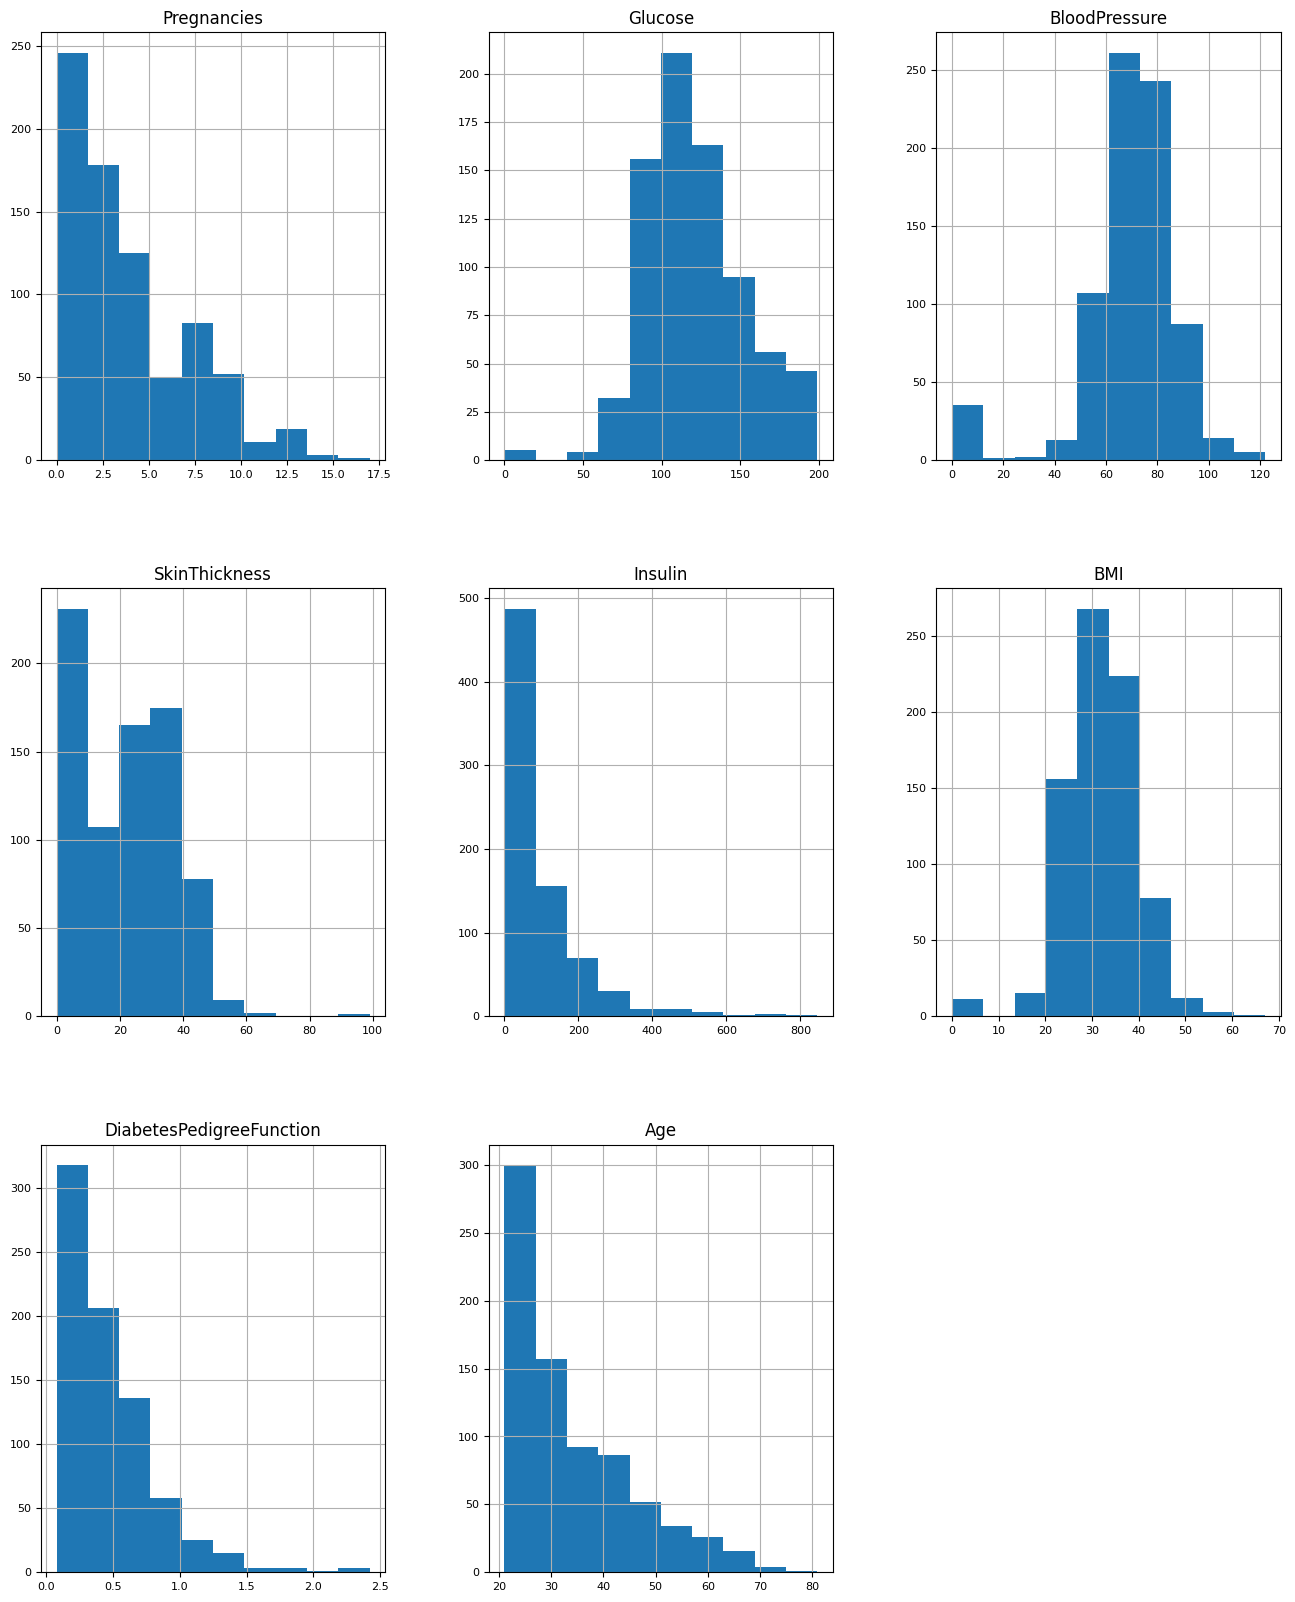

In [28]:
df_analise_2 = df.drop('Outcome', axis=1)

# plotting a histogram for each numeric variable
df_analise_2.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8);


In [30]:
df_analise_2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [38]:
# removendo casos em que os valores estão zerados

mask1 = ((df['BloodPressure'] > 0) & (df['Glucose'] > 0) & (df['BMI'] > 0) & (df['SkinThickness'] < 99))

df_analise_3 = df[mask1]

<Axes: >

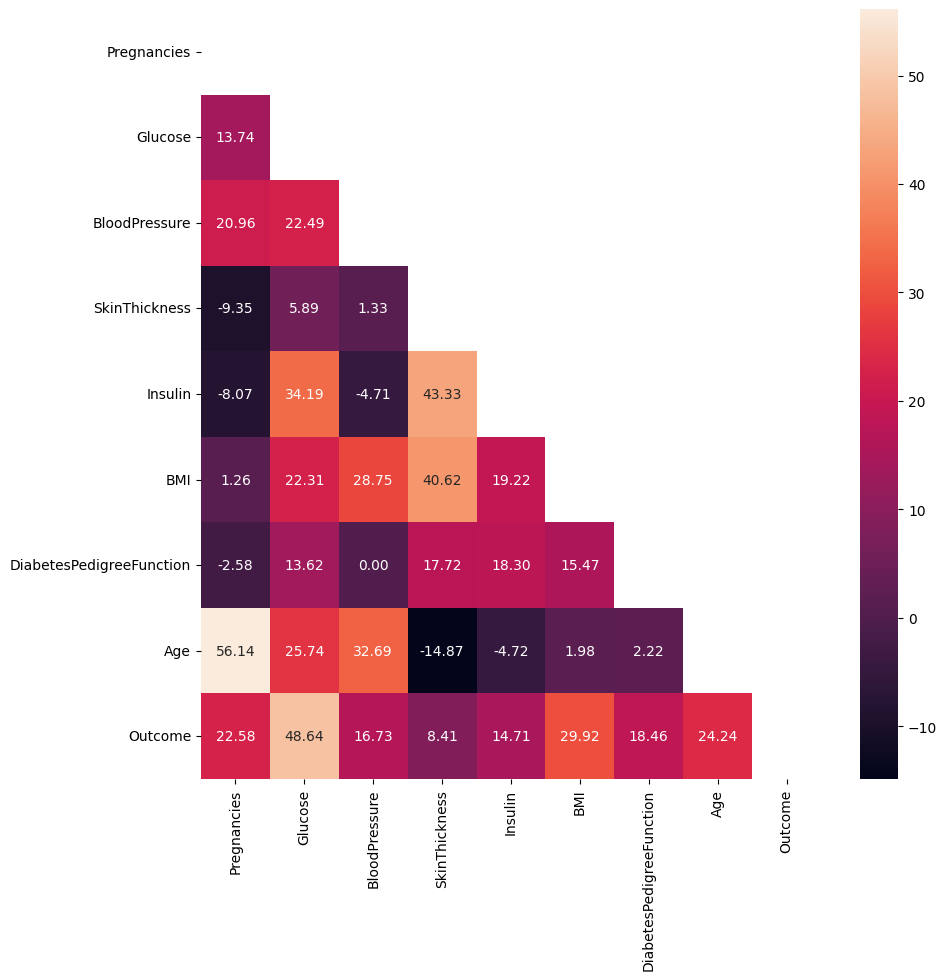

In [39]:
# Avaliando a correlação entre as variáveis
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(df_analise_3.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_analise_3.corr()*100, annot=True, fmt=".2f", mask=mask)

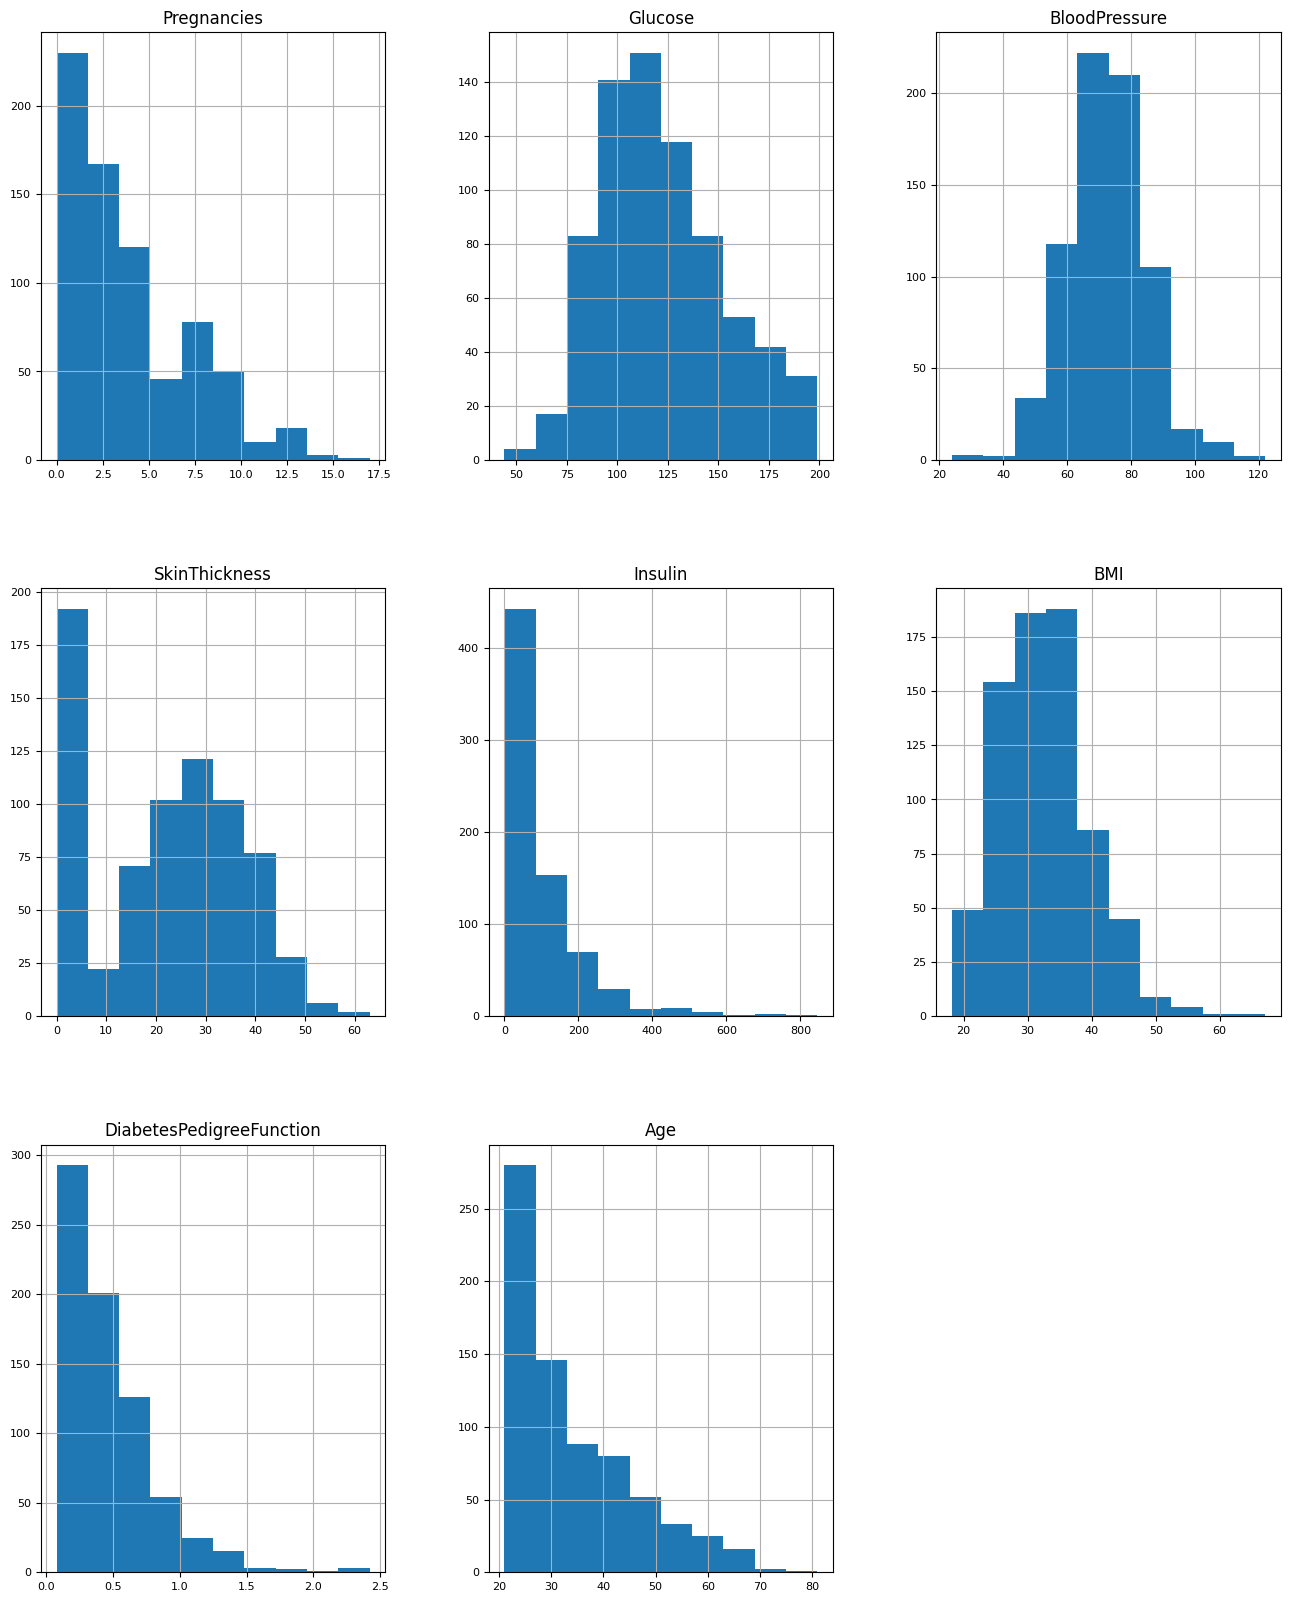

In [40]:
df_analise_3_histograma = df_analise_3.drop('Outcome', axis=1)

# plotting a histogram for each numeric variable
df_analise_3_histograma.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8, bins = 10);

In [41]:
df_analise_3.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.868603,121.778700,72.403873,21.336100,84.611342,32.464039,0.474627,33.311203,0.343015
std,3.364413,30.643889,12.388118,15.476429,117.055233,6.893208,0.332524,11.725093,0.475045
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,141.500000,80.000000,33.000000,131.000000,36.600000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# separando os dados em treino e teste - base sem outliers
X = df_analise_3.drop('Outcome', axis=1)
y = df_analise_3['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Gerando o modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

acc_treino = knn.score(X_train, y_train)
acc_teste = knn.score(X_test, y_test)

print(f'Acuracia Treino: {acc_treino * 100}')
print(f'Acuracia Teste: {acc_teste * 100}')

Acuracia Treino: 79.58477508650519
Acuracia Teste: 75.86206896551724


In [56]:
# aplicando predict
prev_teste = knn.predict(X_test)

In [57]:
# validando a acuracia
print(classification_report(y_test, prev_teste))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       100
           1       0.61      0.60      0.61        45

    accuracy                           0.76       145
   macro avg       0.72      0.71      0.72       145
weighted avg       0.76      0.76      0.76       145



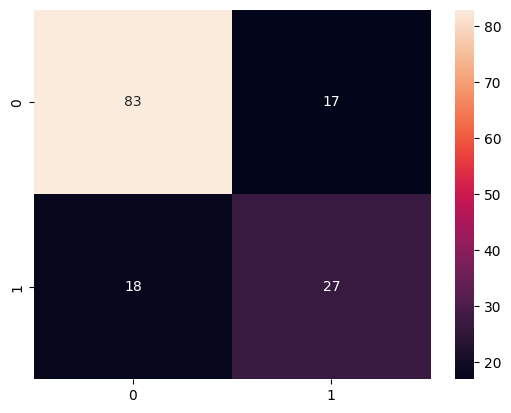

In [58]:
# plotando matriz de confusao
cm = confusion_matrix(y_test, prev_teste)
sns.heatmap(cm, annot=True, fmt='d');

## Conclusões

1. Ao avaliar as distribuições das variáveis numéricas, identificamos registros incorretos que não faziam sentido para a avaliação de negócio. Casos como Pressão sanguínea e IMC (BMI) com valores zerados;

2. Foram identificados outliers que oneravam a performance do modelo. Como por exemplo: SkinThickness com valores superiores ao 3 quartil da distribuição (1 caso);

3. Na análise de correlação das variáveis, identificamos fatores com alta correlação com a variável Outcome, identificando pacientes com diabetes ou não como Glucose, Age, BMI e pregnancies;

4. Ao realizar uma primeira versão do modelo de KNN na base não tratada, obtivemos uma acurácia de 66% em nossos dados de teste. Ao realizarmos o tratamento da base e remoção de outliers, atingimos uma acurácia de 76%, trazendo um ganho significativo na performance do modelo.